In [ ]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [ ]:
# Select relevant features
features = df[['CreditScore', 'Geography', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]


In [ ]:
# Target variable (churned or not)
target = df['Exited']


In [ ]:
# Encode categorical features
features = pd.get_dummies(features, columns=['Geography'], drop_first=True)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
random_forest_predictions = random_forest_model.predict(X_test)


In [ ]:
# Evaluate the Random Forest model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_confusion = confusion_matrix(y_test, random_forest_predictions)
random_forest_report = classification_report(y_test, random_forest_predictions)


In [ ]:
print("Random Forest Model:")
print(f"Accuracy: {random_forest_accuracy}")
print("Confusion Matrix:")
print(random_forest_confusion)
print("Classification Report:")
print(random_forest_report)


Random Forest Model:
Accuracy: 0.867
Confusion Matrix:
[[1543   64]
 [ 202  191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



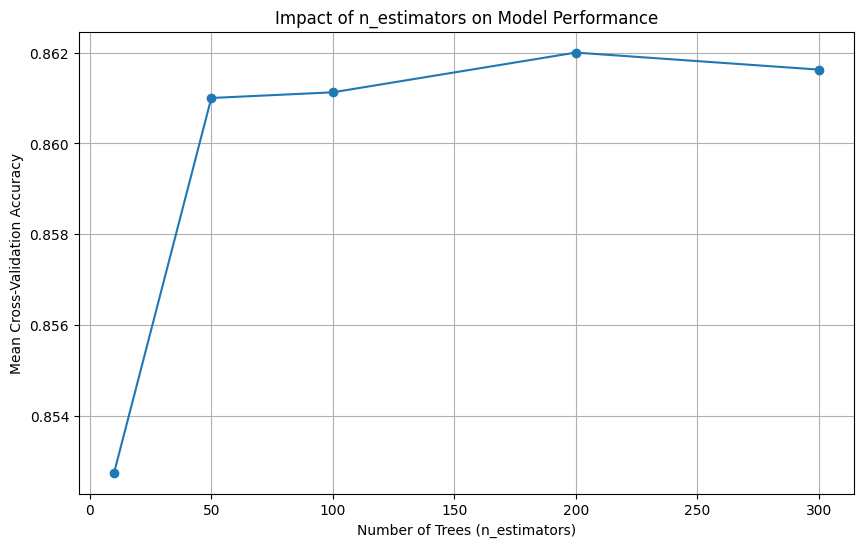

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define a range of values for the hyperparameter (number of trees)
n_estimators_values = [10, 50, 100, 200, 300]
mean_scores = []

# Loop through different values of n_estimators
for n_estimators in n_estimators_values:
    # Create a Random Forest model with the current n_estimators value
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Using cross-validation to evaluate the model's performance
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_scores, marker='o')
plt.title('Impact of n_estimators on Model Performance')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()


#Comapring Random Forest model Accuracy with Gradient Boost and Logistic Regression model accuracy

In [ ]:
import xgboost as xgb
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_confusion = confusion_matrix(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)

print("XGBoost Model:")
print(f"Accuracy: {xgb_accuracy}")
print("Confusion Matrix:")
print(xgb_confusion)
print("Classification Report:")
print(xgb_report)


XGBoost Model:
Accuracy: 0.8585
Confusion Matrix:
[[1515   92]
 [ 191  202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.69      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_confusion = confusion_matrix(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions)

print("Logistic Regression Model:")
print(f"Accuracy: {logistic_accuracy}")
print("Confusion Matrix:")
print(logistic_confusion)
print("Classification Report:")
print(logistic_report)

Logistic Regression Model:
Accuracy: 0.8005
Confusion Matrix:
[[1573   34]
 [ 365   28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



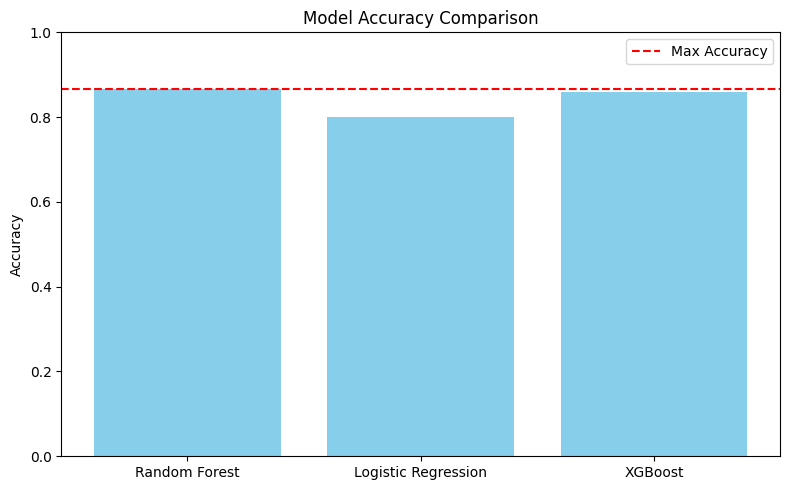

In [ ]:
import matplotlib.pyplot as plt

# Define the model names
models = ['Random Forest', 'Logistic Regression', 'XGBoost']

# Define the accuracy values for each model
accuracy = [random_forest_accuracy, logistic_accuracy, xgb_accuracy]

# Create a bar graph for accuracy
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Add horizontal lines for maximum accuracy
max_accuracy = max(accuracy)
for i, bar in enumerate(bars):
    if accuracy[i] == max_accuracy:
        plt.axhline(max_accuracy, color='red', linestyle='--', label='Max Accuracy')

# Show the plot with a legend
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
